# Co 60

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


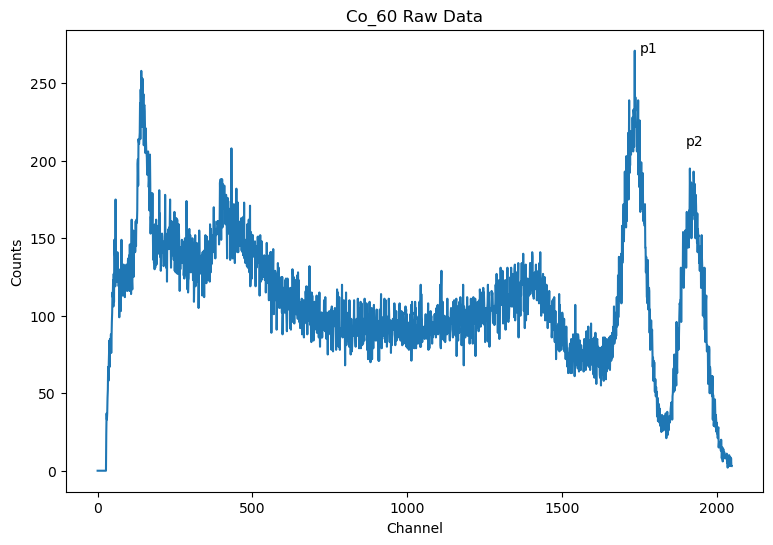

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

#convert csv file to pd data frame (df), check first 10 values with df.head

Co_60_df = pd.read_csv("Co_60.csv")
print(Co_60_df.head())

# label x and y df columns & make raw data plot

Co_60_x = Co_60_df["Channel"]
Co_60_y = Co_60_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Co_60 Raw Data")

# use annotate to mark the peaks
plt.annotate( 'p1', xy=(1750, 270), xytext=(1750, 270),
            )
plt.annotate('p2', xy=(1900, 210), xytext=(1900, 20),
            )

plt.plot(Co_60_x, Co_60_y)
plt.show()

# Peak 1 & 2: 1.175 MeV & 1.333 MeV

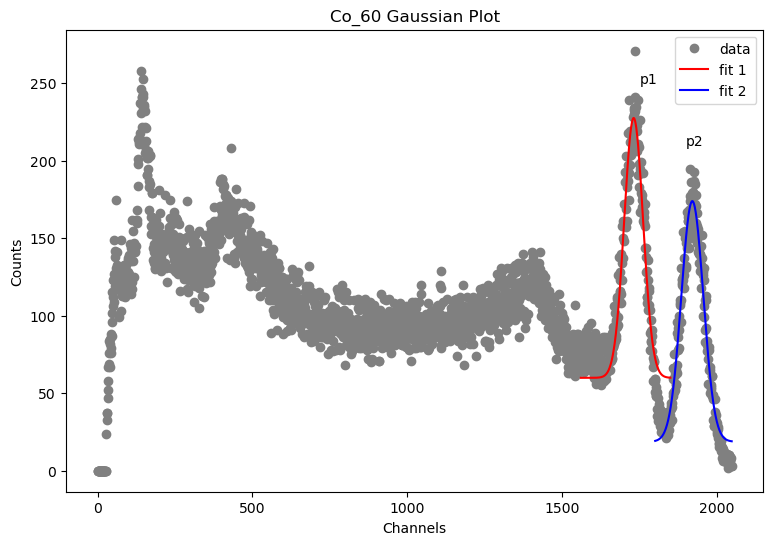

Fit Amplitude 1:  167.65580283157072 ± 3.155853019811714 
 Fit Mean 1:  1730.4951595240038 ± 0.6201210567239862 
 Fit Epsilon 1:  928.6686169382436 ± 45.042675925227755 
 Fit C 1:  59.937425656091285 ± 1.5662603218666897


Fit Amplitude 2:  155.21414999144133 ± 2.1607083493026797 
 Fit Mean 2:  1919.9092388505846 ± 0.490751923973967 
 Fit Epsilon 2:  1260.4037781258646 ± 49.329617867901796 
 Fit C 2:  18.743648769742382 ± 1.5405063703273592


In [48]:
## need to do gaussian fit for each peak, need to define variable for each
## define gaussian function with constants names 

def gaus(x, a, m, e, c):
    fit = a*np.exp(( -(x - m)**2) / (2 * e) ) + c
    return fit


## for peak 1:

# define x and y value ranges
Co_60_x_slice_1 = Co_60_x[1560:1850]
Co_60_y_slice_1 = Co_60_y[1560:1850]

# define popt1 and pcov1, solve for a1, m1, e1, and c1
Co_60_popt_1, Co_60_pcov_1 = curve_fit( gaus, Co_60_x_slice_1, Co_60_y_slice_1, p0 = [a1:=200, m1:=1700, e1:=150, c1:=50])

#create gaussian with fitted values
Co_60_y_fit_1= gaus( Co_60_x_slice_1, *Co_60_popt_1)
 
    
## for peak 2:

# define x and y value ranges
Co_60_x_slice_2 = Co_60_x[1800:2200]
Co_60_y_slice_2 = Co_60_y[1800:2200]

# define popt2 and pcov2, solve for a2, m2, e2, and c2
Co_60_popt_2, Co_60_pcov_2 = curve_fit( gaus, Co_60_x_slice_2, Co_60_y_slice_2, p0 = [a2:=160, m2:=1950, e2:=110, c2:=5])

#create gaussian with fitted values
Co_60_y_fit_2= gaus( Co_60_x_slice_2, *Co_60_popt_2)

## plot both peaks in fit curve
plt.figure(figsize=(9,6))

plt.plot(Co_60_x, Co_60_y, color='gray', marker='o', ls='None', label="data")
plt.plot(Co_60_x_slice_1, Co_60_y_fit_1, 'r-', label='fit 1') # peak 1
plt.plot(Co_60_x_slice_2, Co_60_y_fit_2, 'b-', label='fit 2') # peak 2

plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Co_60 Gaussian Plot")
plt.legend()

# use annotate to mark the peaks
plt.annotate( 'p1', xy=(1750, 250), xytext=(1750, 250),
            )
plt.annotate('p2', xy=(1900, 210), xytext=(1900, 210),
            )
plt.show()


# print fit values of gaussian constants & uncertainties (sigma)
sigma_1 = np.sqrt(np.diag(Co_60_pcov_1))       
sigma_2 = np.sqrt(np.diag(Co_60_pcov_2))     

print("Fit Amplitude 1: ", Co_60_popt_1[0], u"\u00B1" , sigma_1[0],
        "\n Fit Mean 1: ", Co_60_popt_1[1], u"\u00B1", sigma_1[1],
        "\n Fit Epsilon 1: ", Co_60_popt_1[2], u"\u00B1", sigma_1[2],
        "\n Fit C 1: ", Co_60_popt_1[3], u"\u00B1", sigma_1[3])
print("\n")
print("Fit Amplitude 2: ", Co_60_popt_2[0], u"\u00B1" , sigma_2[0],
        "\n Fit Mean 2: ", Co_60_popt_2[1], u"\u00B1", sigma_2[1],
        "\n Fit Epsilon 2: ", Co_60_popt_2[2], u"\u00B1", sigma_2[2],
        "\n Fit C 2: ", Co_60_popt_2[3], u"\u00B1", sigma_2[3])